<a href="https://colab.research.google.com/github/ValdemarBirkegaardPetersen/Image-Processing/blob/main/Valdemar_IP_HandIn_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Run First 
import numpy as np                         
import pandas as pd                       
import cv2                           
from google.colab.patches import cv2_imshow 
from skimage import io                      
from PIL import Image                       
import matplotlib.pylab as plt              
import copy                                 
from google.colab import files
from io import BytesIO

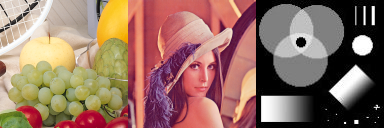

In [3]:
ioFruit = io.imread("https://homepages.cae.wisc.edu/~ece533/images/fruits.png") 
ioLena = io.imread("https://homepages.cae.wisc.edu/~ece533/images/lena.png") 
ioShapes = io.imread("https://i.imgur.com/eXj7Xgb.jpg")
ioMorph = io.imread("https://i.imgur.com/BXCJO5k.png")

fruitRGB = cv2.cvtColor(ioFruit,cv2.COLOR_BGR2RGB)
lenaRGB = cv2.cvtColor(ioLena, cv2.COLOR_BGR2RGB)
shapesRGB = cv2.cvtColor(ioShapes, cv2.COLOR_BGR2RGB)
morphRGB = cv2.cvtColor(ioMorph, cv2.COLOR_BGR2RGB)

_fruit128 = cv2.resize(ioFruit,(128,128), interpolation = cv2.INTER_AREA)
_lena128 = cv2.resize(ioLena,(128,128), interpolation = cv2.INTER_AREA)
_shapes128 = cv2.resize(ioShapes,(128,128), interpolation = cv2.INTER_AREA)
_morph256 = cv2.resize(ioMorph,(256,256), interpolation = cv2.INTER_AREA)

fruit128 = cv2.cvtColor(_fruit128, cv2.COLOR_BGR2RGB)
lena128 = cv2.cvtColor(_lena128,cv2.COLOR_BGR2RGB)
shapes128 = cv2.cvtColor(_shapes128, cv2.COLOR_BGR2RGB)
morph256 = cv2.cvtColor(_morph256,cv2.COLOR_BGR2RGB)


multi = cv2.hconcat((fruit128,lena128,shapes128))
cv2_imshow(multi)


3


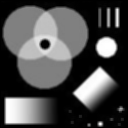

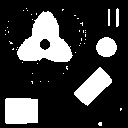

In [ ]:
# Program a 3x3 MEAN BLUR  using CORRELATION

inputM = np.zeros((128,128,3), np.uint8)
outputM = np.zeros((128,128,3),np.uint8)

kernel = np.array([[1,1,1],[1,1,1],[1,1,1]])

print(shapes128.shape[2])

for y in range(1,shapes128.shape[0]-1):
  for x in range(1,shapes128.shape[1]-1):
    for c in range (shapes128.shape[2]):
      sum = 0 
      for ky in range(3):
        for kx in range(3):
          sum += shapes128[y-ky-1, x+kx-1,c] * kernel[ky,kx]
        inputM[y,x,c] = sum / 9.0

        if(inputM[y,x,c] > 128):
          outputM [y,x,c] = 255

cv2_imshow(inputM)
cv2_imshow(outputM)


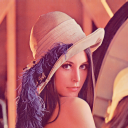

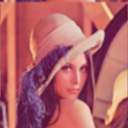

In [ ]:
# Program a 3x3 GAUSIAN BLUR  using CORRELATION 

inputG = np.zeros((128,128,3), np.uint8)

kernelG = np.array([[1,2,1],[2,4,2],[1,2,1]])

for y in range(-1,shapes128.shape[0]-1):
  for x in range(-1,shapes128.shape[1]-1):
    for c in range (shapes128.shape[2]):
      sum = 0 
      for ky in range(3):
        for kx in range(3):
          sum += lena128[y-ky-1,x+kx-1,c] * kernelG[ky,kx]
        inputG [y,x,c] = sum / 16.0
        
cv2_imshow(lena128)
cv2_imshow(inputG)

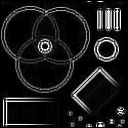

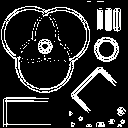

In [ ]:
#Program a 3x3 GAUSIAN EDGE DETECTION using CORRELATION

inputGE = np.zeros((128,128,3), np.uint32)
outputGE = np.zeros((128,128,3), np.uint32)
kernelGE = np.array([[1,2,1],[2,-12,2],[1,2,1]])

for y in range(1,shapes128.shape[0]-1):
  for x in range(1,shapes128.shape[1]-1):
    for c in range(shapes128.shape[2]):
      sum = 0 
      for ky in range(3):
        for kx in range(3):
          #using blurred image
          sum += inputM[y-ky-1,x+kx-1,c] * kernelGE[ky,kx]

        inputGE[y,x,c] = abs(sum)

        if(inputGE[y,x,c] > 52):
          outputGE[y,x,c] = 255
        else:
          outputGE[y,x,c] = 0

cv2_imshow(inputGE)
cv2_imshow(outputGE)


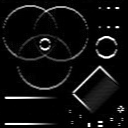

In [ ]:
#Program a 3x3 SOBEL HORIZONTAL EDGE  using CORRELATION
SHE = copy.copy(shapes128)

inputSVE = np.zeros((128,128,3), np.uint32)

kernelSVE = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])



for y in range(SHE.shape[0]-1):
  for x in range(SHE.shape[1]-1):
    for c in range(SHE.shape[2]):
      sum = 0
      for ky in range(3):
        for kx in range(3): 
          sum += SHE[y-ky-1,x+kx-1,c] * kernelSVE[ky,kx]
        inputSVE[y,x,c] = abs(sum)

cv2_imshow(inputSVE/3)

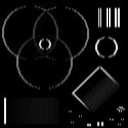

In [ ]:
#Program a 3x3 SOBEL VERTICAL EDGE  using CORRELATION

horiz2= copy.copy(shapes128)

inputSHE = np.zeros((128,128,3), np.uint32)

kernelSHE = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])

for y in range(horiz2.shape[0]-1):
  for x in range(horiz2.shape[1]-1):
    for c in range(horiz2.shape[2]):
      sum = 0 
      for ky in range(3):
        for kx in range(3):
          sum += horiz2[y-ky-1,x+kx-1,c] * kernelSHE[ky,kx]
      inputSHE[y,x,c] = abs(sum)

cv2_imshow(inputSHE/4)

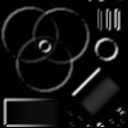

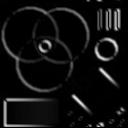

In [ ]:
#Program a 3x3 SOBEL DIAGONAL EDGE  using CORRELATION
diag = copy.copy(inputM)

inputDia = np.zeros((128,128,3), np.uint32)
inputDiag = np.zeros((128,128,3),np.uint32)

diagX = np.array([[0,1,2],[-1,0,1],[-2,-1,0]])
diagY = np.array([[-2,-1,0],[-1,0,1],[0,1,2]])

for y in range(diag.shape[0]-1):
  for x in range(diag.shape[1]-1):
    for c in range(diag.shape[2]):
      sum = 0
      sum2 = 0
      for ky in range(3):
        for kx in range(3): 
          sum += diag[y-ky-1,x+kx-1,c] * diagX [ky,kx]
          sum2 += diag[y-ky-1,x+kx-1,c] * diagY [ky,kx]
          
        inputDia [y,x,c] = abs(sum)
        inputDiag[y,x,c] = abs(sum2)

#Show left diagonals
cv2_imshow(inputDia/3)
#Show right diagonals
cv2_imshow(inputDiag/3)

Vertical Prewitt:


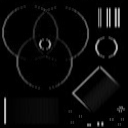

Horizontal Prewitt:


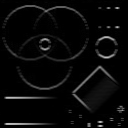

In [ ]:
#Program a 3x3 PREWITT HORIZONTAL EDGE using CORRELATION
#Program a 3x3 PREWITT VERTICAL EDGE using CORRELATION

pwBW = cv2.cvtColor(shapes128,cv2.COLOR_RGB2GRAY)

pwInput = np.zeros((128,128,1),np.uint32)
pwOutput = np.zeros((128,128,1),np.uint32)

pwX =  np.array([[-1,0,1],
                  [-1,0,1],
                  [-1,0,1]])

pwY =    np.array([[-1,-1,-1],
                   [0,0,0],
                   [1,1,1]])

for y in range(pwBW.shape[0]-1):
  for x in range(pwBW.shape[1]-1): 
      sumPW = 0
      sumPW2 = 0
      for ky in range(3):
        for kx in range(3):
          sumPW += pwBW[y-ky-1,x+kx-1] * pwX[ky,kx]
          sumPW2 += pwBW[y-ky-1,x+kx-1] * pwY[ky,kx]
        pwOutput[y,x] = abs(sumPW)
        pwInput[y,x] = abs(sumPW2)

print("Vertical Prewitt:")
cv2_imshow(pwOutput/4)
print("Horizontal Prewitt:")
cv2_imshow(pwInput/4)


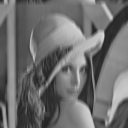

In [ ]:
#Program a 5x1 MEAN BLUR  using CORRELATION

img51__ = copy.copy(lena128)
imgimg = cv2.cvtColor(img51__,cv2.COLOR_RGB2GRAY)

inputMD = np.zeros((128,128,1), np.uint8)
kernel51__ = np.array([[1,1,1,1,1]])

for y in range(imgimg.shape[0]):
  for x in range(imgimg.shape[1]): 
    sumMD = 0 
    for ky in range(1):
      for kx in range(5):
        sumMD += imgimg[y-kx-1,x] * kernel51__[ky,kx]
      inputMD[y,x] = sumMD / 5.0
    
cv2_imshow(inputMD)

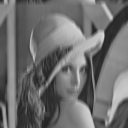

In [ ]:
#Program a 1x5 MEAN BLUR  using CORRELATION

img15_ = copy.copy(lena128)
img15 = cv2.cvtColor(img15_,cv2.COLOR_RGB2GRAY)

input15 = np.zeros((128,128,1), np.uint8)

kernel15 = np.array([[1],[1],[1],[1],[1]])

for y in range(img15.shape[0]):
  for x in range(img15.shape[1]):
    sum15 = 0
    for ky in range(5):
       sum15 += img15[y-ky-1,x] * kernel15 [ky]
    input15 [y,x] = sum15 / 5.0
    
cv2_imshow(input15)

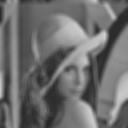

In [ ]:
#Program a 5x5 MEAN BLUR  using CORRELATION
img55_ = copy.copy(lena128)
img55 = cv2.cvtColor(img55_,cv2.COLOR_RGB2GRAY)

kernel55 = np.array([[1,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1]])

input55 = np.zeros((128,128,1), np.uint8)

for y in range(img55.shape[0]):
  for x in range(img55.shape[1]):
    sum55 = 0 
    for ky in range(5):
      for kx in range(5):
        sum55 += img55[y-ky-1,x-kx-1] * kernel55[ky,kx]
    input55[y,x] = sum55 / 25.0
    

cv2_imshow(input55)

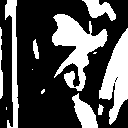

In [ ]:
#Program a 5x5 MEAN BLUR  using CORRELATION and then Threshold  (on a binary (Black and White) image) 
img5x5_ = copy.copy(lena128)
img5x5 = cv2.cvtColor(img5x5_,cv2.COLOR_RGB2GRAY)

kernel5x5 = np.array([[1,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1]])

input5x5 = np.zeros((128,128,1), np.uint8)
inputBin = np.zeros((128,128,1), np.uint8)

for y in range(img5x5.shape[0]):
  for x in range(img5x5.shape[1]):
    sum5x5 = 0 
    for ky in range(5):
      for kx in range(5):
        sum5x5 += img5x5[y-ky-1,x-kx-1] * kernel5x5[ky,kx]
    input5x5[y,x] = sum5x5 / 25.0

#Thresholding
for ty in range(input5x5.shape[0]):
  for tx in range(input5x5.shape[1]):
    if(input5x5[ty,tx] > 127):
      input5x5[ty,tx] = 255
    else:
      input5x5[ty,tx] = 0

cv2_imshow(input5x5)

Disc 5x5 Median Filter


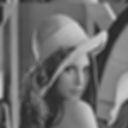

Binarized:


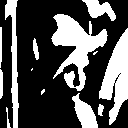

In [4]:
#Program a 5x5 DISC MEDIAN filter
imgDisc = cv2.cvtColor(lena128,cv2.COLOR_RGB2GRAY)

inputDisc = np.zeros((128,128,1),np.uint8)
binarized = np.zeros((128,128,1),np.uint8)
                   
kernelDisc = np.array([[0,1,1,1,0],[1,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1],[0,1,1,1,0]])

for y in range(imgDisc.shape[0]):
  for x in range(imgDisc.shape[1]):
    sumDisc = 0 
    for ky in range(5):
      for kx in range(5):
        sumDisc += imgDisc[y-ky-1,x-kx-1] * kernelDisc[ky,kx]
    inputDisc[y,x] = sumDisc / 21.0

for yy in range(inputDisc.shape[0]):
  for xx in range(inputDisc.shape[1]):
    if(inputDisc[yy,xx] > 127):
      binarized[yy,xx] = 255
    else:
      binarized[yy,xx] = 0
      
print("Disc 5x5 Median Filter")
cv2_imshow(inputDisc)
print("Binarized:")
cv2_imshow(binarized)

Before: 


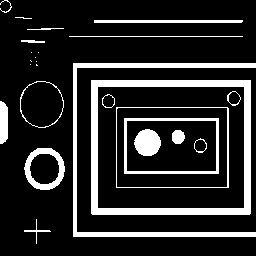

After: 


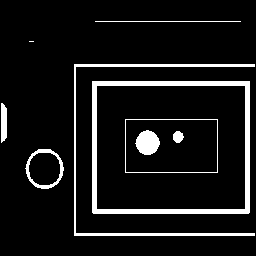

In [29]:
#Program a 3x3 BOX ERODE

_morph = copy.copy(morph256)
morph = cv2.cvtColor(_morph,cv2.COLOR_RGB2GRAY)

inputMorph = np.zeros((256,256,1),np.uint8)
morphBin = np.zeros((256,256,1),np.uint8)

#Binarizing the image
for yy in range(morph.shape[0]):
  for xx in range(morph.shape[1]):
    if(morph[yy,xx] > 90): 
      inputMorph[yy,xx] = 255
    else:
      inputMorph[yy,xx] = 0

#Erosion - If one neighbour pixel is 0 then set image pixel to 0. 
for y in range(inputMorph.shape[0]-1):
  for x in range(inputMorph.shape[1]-1):
    if(inputMorph[y-1,x] == 0 or inputMorph[y+1,x] == 0 or inputMorph[y-1,x-1] == 0 or inputMorph[y-1,x+1] == 0  or inputMorph[y,x-1] == 0 or inputMorph[y,x+1] == 0 or inputMorph[y+1,x-1] == 0 or inputMorph[y+1,x+1] == 0):
      morphBin[y,x] = 0
    else:
      morphBin[y,x] = 255

print("Before: ")
cv2_imshow(inputMorph)
print("After: ")
cv2_imshow(morphBin)

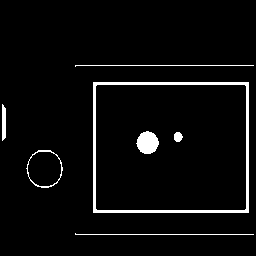

In [51]:
#Program a 5x5 DISC ERODE
disce = copy.copy(inputMorph)

inputDisce55 = np.zeros((256,256,1),np.uint8)
disceBin = np.zeros((256,256,1),np.uint8)

for y in range(disce.shape[0]-2):
  for x in range(disce.shape[1]-2):
    if(disce[y-1,x] == 0 or disce[y+1,x] == 0 or disce[y-1,x-1] == 0 or disce[y-1,x+1] == 0 or disce[y-2,x] == 0 or disce[y-2,x-1] == 0 or disce[y-2,x+1] == 0 or disce[y,x+1] == 0 or disce[y,x-1] == 0
       or disce[y,x-2] == 0 or disce[y,x+2] == 0 or disce[y-1,x-2] == 0 or disce[y-1,x+2] == 0 or disce[y+1,x-1] == 0 or disce[y+1,x-2] == 0 or disce[y+1,x+1] == 0 or disce[y+1,x+2] == 0 or 
       disce[y+2,x-1] == 0 or disce[y+2,x+1] == 0):
      inputDisce55[y,x] = 0
    else:
      inputDisce55[y,x] = 255

cv2_imshow(inputDisce55)